# **TikTok Project - Exploratory Data Analysis (part 2)**

I’ve completed a first inspection of the TikTok dataset. However the work is still in its early stages.

The Senior Data Scientist in the team is pleased with the preliminary work done so far and is requesting to expand the exploratory data analysis and perform some data visualization using matplotlib and seaborn. This will help the management team to get a clearer understanding of the data. We should include a graph comparing claim counts to opinion counts and boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. We should also include a breakdown of “author ban status” counts.

### **Visualize and analyze data** ---


**The purpose** of this project is to conduct further exploratory data analysis and visualization of the data provided. The aim is to learn more about the variables with particular attention to information related to what distinguishes claim videos from opinion videos.
1.   Continue the process of EDA revealing the content of the dataset
2.   Visualize distributions of important variables for the opinion vs. calim classification
3.   Identify outliers and perform an initial round of data cleaning

**The goal** is to explore the dataset and create visualizations.

**A reflection on outliers:**

Identifying outliers:

- Use numpy to compare the mean vs. median, large discrepancies suggest skew or outliers (or use IQR and z-score thresholds)

- Plot boxplots to visualise spread and spot outliers quickly.

Handling outliers::

- Remove: If the outlier is a clear error or typo and you're building a model, especially a sensitive one (e.g. linear regression), deletion may be best — though it's rarely the default choice.

- Adjust: For small datasets or when outliers distort model performance, consider imputing or capping values (e.g. winsorisation).

- Keep: If doing exploratory analysis or using robust models (e.g. tree-based methods), keeping them may be preferable.

There's no one-size-fits-all solution. Treat outliers with intent, based on data quality and model sensitivity.

To start, we import necessary libraries (including `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`) then, load the dataset into a dataframe. Creating a dataframe will help you conduct data manipulation, exploratory data analysis (EDA), and statistical activities...


In [2]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset 
data = pd.read_csv("tiktok_dataset.csv")

Let's recollect the overall info about the dataset using `.head()`, `.size`,`.shape` and `.info()`

In [7]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [8]:
# Get the size of the data
print("Size of the data:", data.size)
# Get the shape of the data
print("Shape of the data:", data.shape)

Size of the data: 232584
Shape of the data: (19382, 12)


In [9]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Now that you have assessed your data, it’s time to plot your visualization(s) using boxplots and histograms to inspect the distribution of several key variables in the dataset. Let's start from `video_duration_sec`.

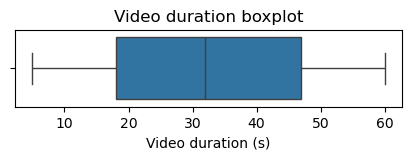

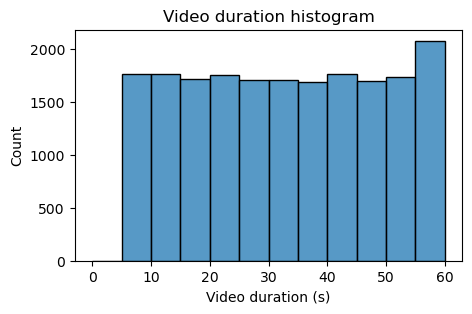

In [18]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=data['video_duration_sec'])
plt.title('Video duration boxplot')
plt.xlabel('Video duration (s)')
plt.show()
# Add a title to the plot
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram')
plt.xlabel('Video duration (s)')
plt.show()

... all videos are 5-60 seconds in length, and the distribution is uniform.

Next let's consider the `video_view_count` column.

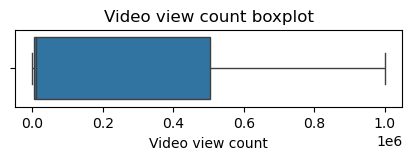

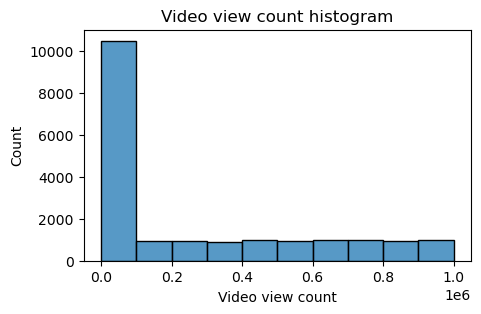

In [20]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5, 1))
plt.title('video_view_count')
sns.boxplot(x=data['video_view_count'])
plt.title('Video view count boxplot')
plt.xlabel('Video view count')
plt.show()
# Create a histogram to visualize distribution of `video_view_count`
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video view count histogram')
plt.xlabel('Video view count')
plt.show()

... this variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.

Next let's consider the `video_like_count` column.

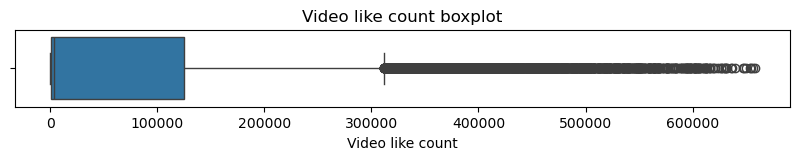

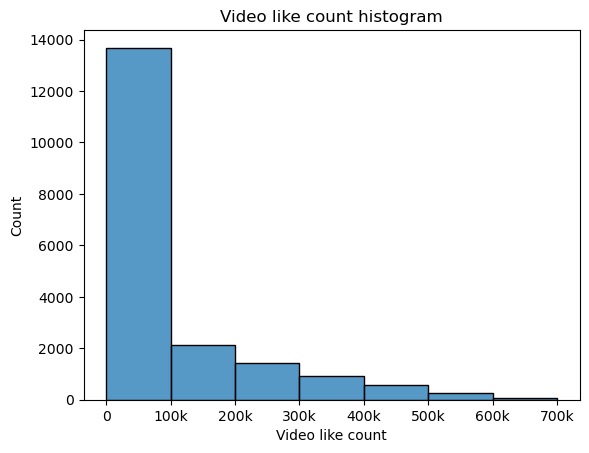

In [21]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=data['video_like_count'])
plt.title('Video like count boxplot')
plt.xlabel('Video like count')
plt.show()
# Create a histogram to visualize distribution of `video_like_count`
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram')
plt.xlabel('Video like count')
plt.show()

... similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.


Next let's consider the `video_comment_count` column.

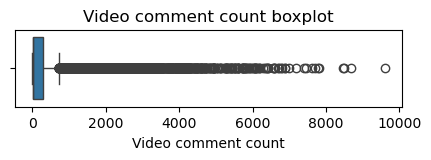

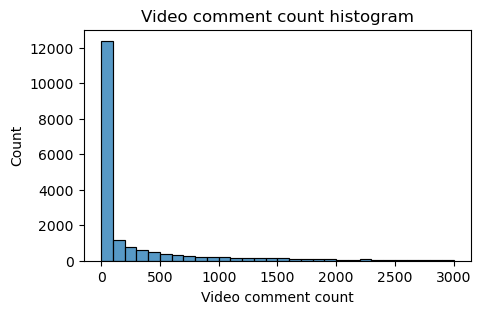

In [22]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x=data['video_comment_count'])
plt.title('Video comment count boxplot')
plt.xlabel('Video comment count')
plt.show()
# Create a histogram to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram')
plt.xlabel('Video comment count')
plt.show()

... Again, the vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

Next let's consider the `video_share_count` column.

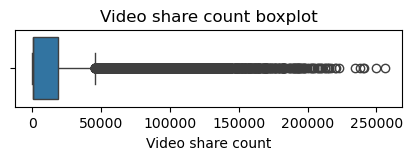

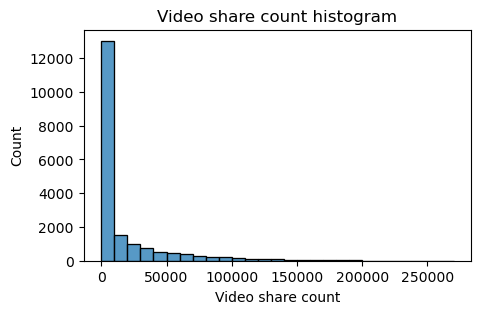

In [23]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=data['video_share_count'])
plt.title('Video share count boxplot')
plt.xlabel('Video share count')
plt.show()
# Create a histogram to visualize distribution of `video_share_count`
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram')
plt.xlabel('Video share count')
plt.show()

...the overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

Finally let's consider the `video_download_count` column.

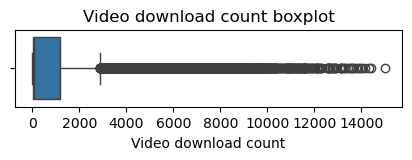

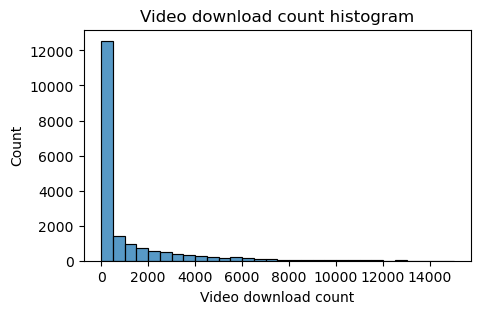

In [24]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count'])
plt.title('Video download count boxplot')
plt.xlabel('Video download count')
plt.show()
# Create a histogram to visualize distribution of `video_download_count`
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram')
plt.xlabel('Video download count')
plt.show()

... the majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

Now, create a histogram with four bars: one for each combination of claim status and verification status using seaborn `histplot`

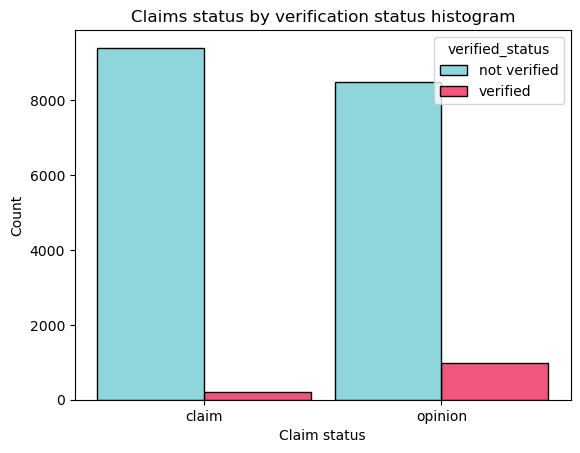

In [37]:
sns.histplot(
    data=data,
    x='claim_status',
    hue='verified_status',
    multiple='dodge',
    shrink=0.9,
    palette={
        'not verified': '#69C9D0',  # TikTok cyan
        'verified': '#EE1D52'       # TikTok magenta
    }
)
plt.title('Claims status by verification status histogram')
plt.xlabel('Claim status') # claim or opinion
plt.show()

... there are far fewer verified users than unverified users, but if a user *is* verified, they are much more likely to post opinions.

Let's examine the count of each claim status for each author ban status (previously we used a `groupby()` statementfor this, now, we use a histogram to communicate the same information).

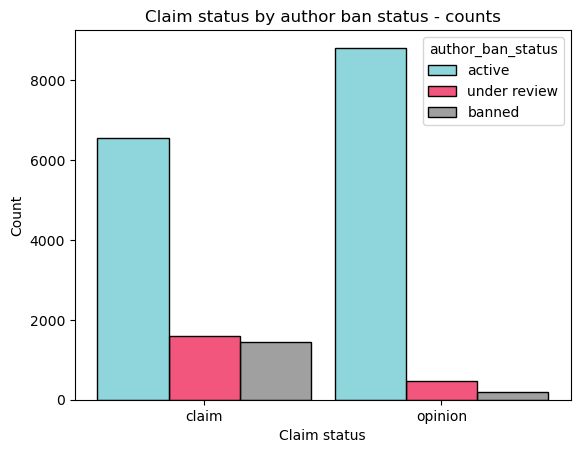

In [40]:
# Create a histogram to visualize distribution of `claim_status` by `verified_status`
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'#69C9D0', 'under review':'#EE1D52', 'banned':'gray'})
plt.xlabel('Claim status') # claim or opinion
plt.ylabel('Count')
plt.title('Claim status by author ban status - counts')
plt.show()

... for both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

Let's now create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

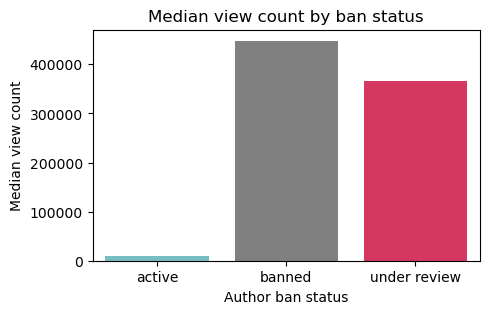

In [46]:
# Create a histogram to visualize distribution of `claim_status` by `verified_status`
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()
fig = plt.figure(figsize=(5, 3))
sns.barplot(
    data=ban_status_counts,
    x='author_ban_status',
    y='video_view_count',
    hue='author_ban_status',
    dodge=False,
    palette={
        'active': '#69C9D0',
        'under review': '#EE1D52',
        'banned': 'gray'
    },
    legend=False
)
plt.title('Median view count by ban status');
plt.xlabel('Author ban status')
plt.ylabel('Median view count')
plt.show()

... the median view counts for non-active authors are many times greater than the median view count for active authors. Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then `video_view_count` might be a good indicator of claim status.

Indeed, a quick check of the median view count by claim status bears out this assessment ...

In [48]:
# Get the median of `video_view_count` for each `claim_status`
median_view_count_by_claim_status = data.groupby('claim_status')['video_view_count'].median()
print("Median view count by claim status:")
print(median_view_count_by_claim_status)

Median view count by claim status:
claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64


#### **CONTINUE FROM HERE ....**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

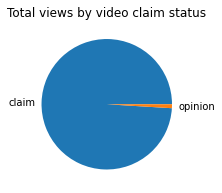

In [24]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

**Exemplar response:** The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [25]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

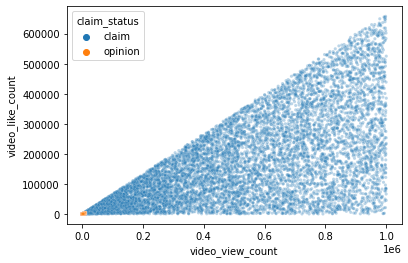

In [26]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()

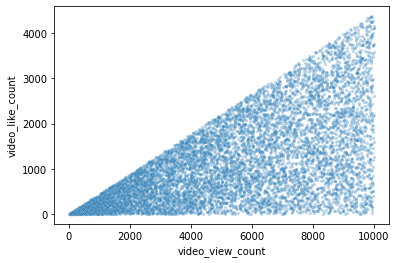

In [27]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


**Exemplar response:**

I have learned ....

* *I examined the data distribution/spread, count frequencies, mean and median values, extreme values/outliers, missing data, and more. I analyzed correlations between variables, particularly between the claim_status variable and others.*

My other questions are ....

* *I want to further investigate distinctive characteristics that apply only to claims or only to opinions. Also, I want to consider other variables that might be helpful in understanding the data.*

My client would likely want to know ...

* *My client would want to know the assumptions regarding what data might be predictive of claim_status.*

### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

**Ask yourself:**
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?



EDA is important because ...

* *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.*

Visualizations helped me understand ..

* *That we will need to make decisions on certain considerations prior to designing a model. (for example, what to do with outliers, duplicate values, or missing data)*


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.